# This notebook contains tests for beijbom_lib

## Testing cycle_runs

In [8]:
run_params = []
run_params.append({'workdir':'/runs/demo/experiment1'})
run_params.append({'workdir':'/runs/demo/experiment2'})

test_params = []
test_params.append({'workdir':'/runs/demo/experiment1', 'scorelayer':'fc8_ifcb'})
test_params.append({'workdir':'/runs/demo/experiment2', 'scorelayer':'fc8_ifcb'})


In [4]:
bct.cycle_runs_debug(run_params, test_params)

Running tests...
Running /runs/demo/experiment1 from 70 to 74 itts.
Running from iter 70.
Classifying ./../vallist.txt from /runs/demo/experiment1/net.prototxt using snapshot_iter_74.caffemodel with bs:128, and 5 total instances.


Classifying ./../testlist.txt from /runs/demo/experiment1/testnet.prototxt using snapshot_iter_74.caffemodel with bs:128, and 5 total instances.


Running /runs/demo/experiment2 from 46 to 50 itts.
Running from iter 46.
Classifying ./../vallist2.txt from /runs/demo/experiment2/net.prototxt using snapshot_iter_50.caffemodel with bs:128, and 5 total instances.


Classifying ./../testlist.txt from /runs/demo/experiment2/testnet.prototxt using snapshot_iter_50.caffemodel with bs:128, and 5 total instances.


Run test OK. Cleaning up.


In [9]:
reload(bct)
bct.cycle_runs(run_params, test_params, [11, 11], 1)

Running /runs/demo/experiment1 from 0 to 11 itts.
Fine tuning from /runs/demo/experiment1/weights.caffemodel.
Classifying ./../vallist.txt from /runs/demo/experiment1/net.prototxt using snapshot_iter_11.caffemodel with bs:128, and 3 total instances.


Classifying ./../testlist.txt from /runs/demo/experiment1/testnet.prototxt using snapshot_iter_11.caffemodel with bs:128, and 30 total instances.


Running /runs/demo/experiment2 from 0 to 11 itts.
Fine tuning from /runs/demo/experiment2/weights.caffemodel.
Classifying ./../vallist2.txt from /runs/demo/experiment2/net.prototxt using snapshot_iter_11.caffemodel with bs:128, and 3 total instances.


Classifying ./../testlist.txt from /runs/demo/experiment2/testnet.prototxt using snapshot_iter_11.caffemodel with bs:128, and 30 total instances.


## Testing bct.classify_imlist

In [35]:
net = bct.load_model('/runs/ifcb_aq/alexnet_basic_lr2/', 'snapshot_iter_20000.caffemodel')

In [11]:
transformer = bct.Transformer()
transformer.set_mean([179, 179, 179])
transformer.set_scale(0.00390625)

asterionellopsis


8.4198008

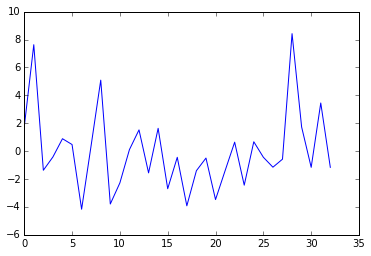

In [52]:
%matplotlib inline

im = bmt.crop_center(np.asarray(Image.open('/runs/ifcb_aq/medianpad240/asterionellopsis/IFCB1_2009_001_001602_00899.png')), 226)
(est, scores) = bct.classify_imlist([im], net, transformer, 1, 'fc8_ifcb', startlayer = 'conv1')
labelset = pickle.load(open('/data/ifcb/labelset_1000.p', 'rb'))
print labelset[est[0]]
scores[0][labelset.index('asterionellopsis')]
plt.plot(scores[0])
scores[0][28]